#Read the data

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Myopia_Data.csv',index_col=0,sep=',')

#Create new features


In [ ]:
data = data.assign(PARENTMY = data.MOMMY + data.DADMY)

In [ ]:
data=data.drop('MOMMY', axis=1)
data=data.drop('DADMY', axis=1)

In [ ]:
data

#Seperate features and lables

In [ ]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = data.drop('MYOPIC', axis=1), data[['MYOPIC']]

#Split data into train and test

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.15)

#Build the model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [ ]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5,
max_depth=4).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc

#Evaluate the trained model

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions, target_names=['NonMyopic','Myopic']))

              precision    recall  f1-score   support

   NonMyopic       0.95      0.95      0.95        85
      Myopic       0.50      0.50      0.50         8

    accuracy                           0.91        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.91      0.91      0.91        93



In [ ]:
confusion_matrix(y_test, predictions)

array([[82,  3],
       [ 4,  4]])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc(fpr, tpr)

0.7323529411764705

#Analtze the results

In [ ]:
importance_df = pd.DataFrame({"gain":model.feature_importances_}, index=X.columns).sort_values("gain", ascending=False)
print("[Feature importance]")
display(importance_df)

[Feature importance]


,gain
SPHEQ,0.427581
SPORTHR,0.080128
TVHR,0.063311
ACD,0.057449
READHR,0.056531
AL,0.047075
PARENTMY,0.047039
VCD,0.044836
LT,0.040839
STUDYYEAR,0.035576


[Permutation importance]


,importances_mean,importances_std
SPHEQ,0.133905,0.004000
SPORTHR,0.030476,0.004587
READHR,0.008000,0.001661
PARENTMY,0.004381,0.001714
STUDYYEAR,0.004190,0.001866
TVHR,0.003810,0.000852
DIOPTERHR,0.003619,0.000571
ACD,0.002286,0.001866
VCD,0.001714,0.001026
LT,0.000952,0.000952


<Axes: >

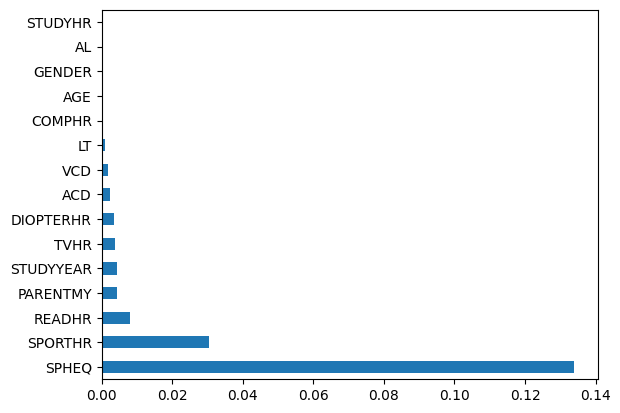

In [ ]:
print("[Permutation importance]")
result = permutation_importance(model, X_train, y_train, n_repeats=10, n_jobs=-1, random_state=71)
result_df = pd.DataFrame({"importances_mean":result["importances_mean"], "importances_std":result["importances_std"]}, index=X.columns)
display(result_df.sort_values("importances_mean", ascending=False))

result_df.sort_values("importances_mean", ascending=False).importances_mean.plot.barh()